In [71]:
from glob import glob
import os
from imzml import IMZMLExtract
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import mglearn
from sklearn.decomposition import PCA

In [2]:
oldDir = r'/media/banikr2/DATA/MALDI/210427_Chen_pos_lipid'
oldImzFile = glob(os.path.join(oldDir, '*.imzML'))
print(oldImzFile)
newDir = r'/media/banikr2/DATA/MALDI/healthy_spinal_cord_IMS-selected'
newImzFile = glob(os.path.join(newDir, '*.imzML'))
print(newImzFile)

['/media/banikr2/DATA/MALDI/210427_Chen_pos_lipid/210427-Chen_poslip.imzML']
['/media/banikr2/DATA/MALDI/healthy_spinal_cord_IMS-selected/220210_reyzerml_IMC_380_plate2A_poslipid-NEW.imzML']


In [4]:
oldImz = IMZMLExtract(oldImzFile[0])

Opening regions file for /media/banikr2/DATA/MALDI/210427_Chen_pos_lipid/210427-Chen_poslip.imzML
1 545 628 244 291
2 695 785 244 303
3 704 798 146 212
4 848 940 201 265
5 988 1071 220 273


In [3]:
newImz = IMZMLExtract(newImzFile[0])

/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


Opening regions file for /media/banikr2/DATA/MALDI/healthy_spinal_cord_IMS-selected/220210_reyzerml_IMC_380_plate2A_poslipid-NEW.imzML
1 325 376 228 304
2 406 462 230 310
3 480 542 216 297
4 560 622 204 289
5 642 700 182 256
6 757 811 181 253
7 832 896 198 271
8 939 1001 201 275
9 1081 1133 199 271
10 1188 1246 199 273


#### Number of spectrums:

In [5]:
len(oldImz.parser.coordinates)

19819

In [6]:
len(newImz.parser.coordinates)

35484

#### m/z:

The number of m/z in MS images seem to be consistent. 

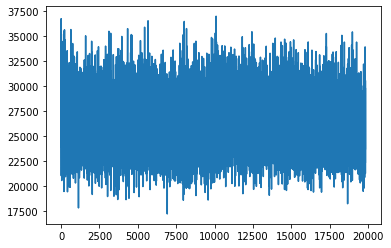

In [10]:
plt.plot(oldImz.parser.mzLengths)

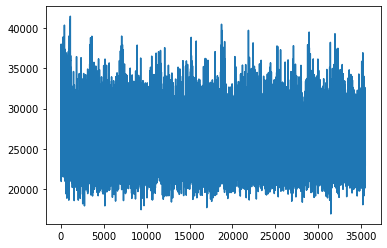

In [32]:
plt.plot(newImz.parser.mzLengths)

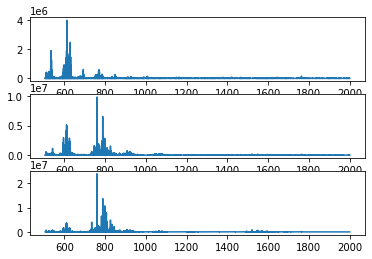

In [12]:
plt.subplot(311)
plt.plot(oldImz.parser.getspectrum(12)[0], oldImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(oldImz.parser.getspectrum(600)[0], oldImz.parser.getspectrum(600)[1])
plt.subplot(313)
plt.plot(oldImz.parser.getspectrum(1331)[0], oldImz.parser.getspectrum(1331)[1])
plt.show()

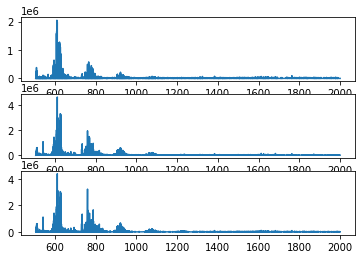

In [23]:
plt.subplot(311)
plt.plot(newImz.parser.getspectrum(12)[0], newImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(newImz.parser.getspectrum(6000)[0], newImz.parser.getspectrum(6000)[1])
plt.subplot(313)
plt.plot(newImz.parser.getspectrum(13031)[0], newImz.parser.getspectrum(13031)[1])
plt.show()

In [36]:
regionID = 1
regInd = oldImz.get_region_indices(regionID)
# for i, coord in enumerate(regInd):
#     spectrum = self.imzObj.parser.getspectrum(self.imzObj.coord2index.get(coord)) #[0]

In [38]:
len(regInd)

3142

In [43]:
oldImz.parser.getspectrum(100)[0][-1]

1999.982666015625

same min and max m/z value in all spectrum. 

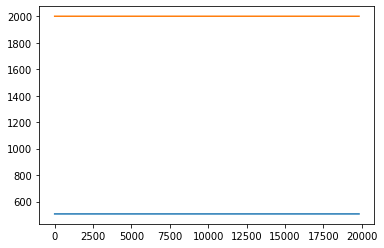

In [44]:
minmz = []
maxmz = []
for i in range(len(oldImz.parser.coordinates)):
    minmz.append(oldImz.parser.getspectrum(i)[0][0])
    maxmz.append(oldImz.parser.getspectrum(i)[0][-1])
    
plt.plot(minmz)
plt.plot(maxmz)

In [52]:
min(minmz), np.std(minmz), max(maxmz), np.std(maxmz)

(506.8382263183594, 0.0, 1999.982666015625, 0.0)

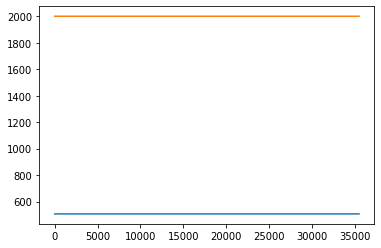

In [53]:
minmz2 = []
maxmz2 = []
for i in range(len(newImz.parser.coordinates)):
    minmz2.append(newImz.parser.getspectrum(i)[0][0])
    maxmz2.append(newImz.parser.getspectrum(i)[0][-1])
    
plt.plot(minmz2)
plt.plot(maxmz2)

In [54]:
min(minmz2), np.std(minmz2), max(maxmz2), np.std(maxmz2)

(506.84063720703125, 0.0, 1999.9779052734375, 0.0)

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 1 with shape (84, 48, 36755)
Found region 1 with shape (84, 48, 36755)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:27
|##############################################################################################################################################################################################| 100% Time: 0:00:00


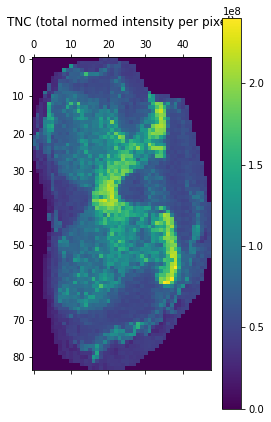

In [15]:
oldImz.plot_tnc(oldImz.get_region_array(1))

1 ((325, 376, 228, 304), 3336)
2 ((406, 462, 230, 310), 3701)
3 ((480, 542, 216, 297), 4026)
4 ((560, 622, 204, 289), 4053)
5 ((642, 700, 182, 256), 3577)
6 ((757, 811, 181, 253), 3167)
7 ((832, 896, 198, 271), 3319)
8 ((939, 1001, 201, 275), 3740)
9 ((1081, 1133, 199, 271), 2996)
10 ((1188, 1246, 199, 273), 3569)


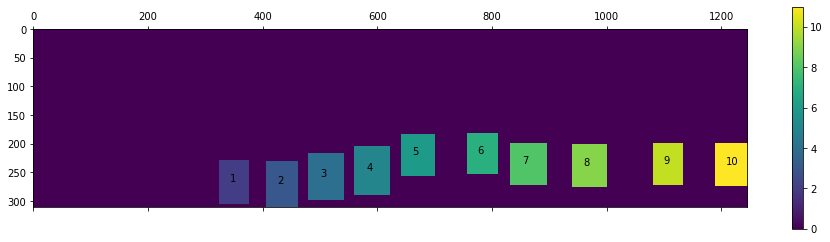

{1: ((325, 376, 228, 304), 3336),
 2: ((406, 462, 230, 310), 3701),
 3: ((480, 542, 216, 297), 4026),
 4: ((560, 622, 204, 289), 4053),
 5: ((642, 700, 182, 256), 3577),
 6: ((757, 811, 181, 253), 3167),
 7: ((832, 896, 198, 271), 3319),
 8: ((939, 1001, 201, 275), 3740),
 9: ((1081, 1133, 199, 271), 2996),
 10: ((1188, 1246, 199, 273), 3569)}

In [20]:
newImz.list_regions()

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 1 with shape (52, 77, 41436)
Found region 1 with shape (52, 77, 41436)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:00
|##############################################################################################################################################################################################| 100% Time: 0:00:01


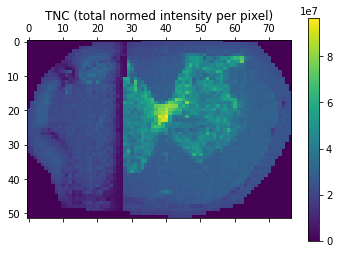

In [19]:
newImz.plot_tnc(newImz.get_region_array(1))

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 2 with shape (57, 81, 38959)
Found region 2 with shape (57, 81, 38959)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:30
|##############################################################################################################################################################################################| 100% Time: 0:00:01


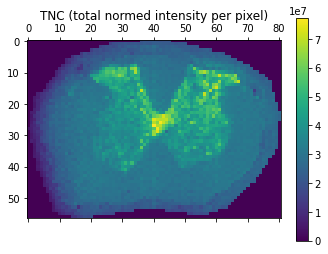

In [17]:
newImz.plot_tnc(newImz.get_region_array(2))

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 7 with shape (65, 74, 39692)
Found region 7 with shape (65, 74, 39692)
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:27
|##############################################################################################################################################################################################| 100% Time: 0:00:01


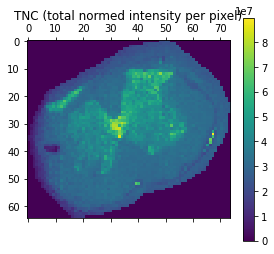

In [18]:
newImz.plot_tnc(newImz.get_region_array(7))

#### Comparison between post cardinal/peak processing

In [55]:
newCDir = r'/media/banikr2/DATA/MALDI/fromCardinal/healthy_spinal_cord_IMS-selected'
newCFile = glob(os.path.join(newCDir, '*.imzML'))
print(newCFile)

['/media/banikr2/DATA/MALDI/fromCardinal/healthy_spinal_cord_IMS-selected/220210_reyzerml_IMC_380_plate2A_poslipid-NEW.imzML']


/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  % (accession, raw_name, name)
/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  % (accession, raw_name, name)
/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions


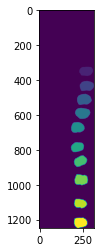

Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished


In [56]:
newCImz = IMZMLExtract(newCFile[0])

In [26]:
oldCDir = r'/media/banikr2/DATA/MALDI/fromCardinal/PosLip'
oldCFile = glob(os.path.join(oldCDir, '*.imzML'))
print(oldCFile)

['/media/banikr2/DATA/MALDI/fromCardinal/PosLip/210427-Chen_poslip-peakpicked.imzML']


In [80]:
oldCImz = IMZMLExtract(oldCFile[0])

/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  % (accession, raw_name, name)
/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  % (accession, raw_name, name)
/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


Opening regions file for /media/banikr2/DATA/MALDI/fromCardinal/PosLip/210427-Chen_poslip-peakpicked.imzML
1 545 628 244 291
2 695 785 244 303
3 704 798 146 212
4 848 940 201 265
5 988 1071 220 273


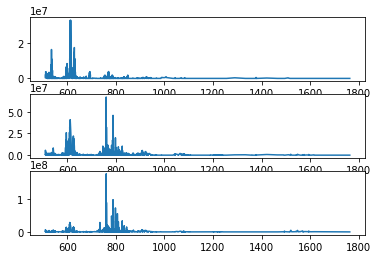

In [81]:
plt.subplot(311)
plt.plot(oldCImz.parser.getspectrum(12)[0], oldCImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(oldCImz.parser.getspectrum(600)[0], oldCImz.parser.getspectrum(600)[1])
plt.subplot(313)
plt.plot(oldCImz.parser.getspectrum(1331)[0], oldCImz.parser.getspectrum(1331)[1])
plt.show()

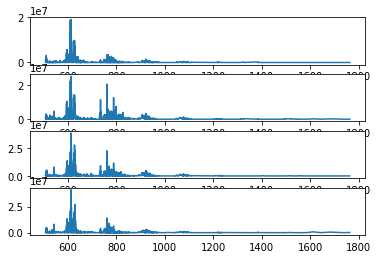

In [60]:
plt.subplot(411)
plt.plot(newCImz.parser.getspectrum(12)[0], newCImz.parser.getspectrum(12)[1])
plt.subplot(412)
plt.plot(newCImz.parser.getspectrum(600)[0], newCImz.parser.getspectrum(600)[1])
plt.subplot(413)
plt.plot(newCImz.parser.getspectrum(13031)[0], newCImz.parser.getspectrum(13031)[1])
plt.subplot(414)
plt.plot(newCImz.parser.getspectrum(34031)[0], newCImz.parser.getspectrum(34031)[1])
plt.show()

In [62]:
class Binning(object):
    """
    given the imze object should create 3D matrix(spatial based) or 2D(spectrum based)
    spectrum: array with 2 vectors, one of abundance(1), other with m/z values(0)
    n_bins: number of bins/samples to be digitized
    plotspec: to plot the new binned spectrum, default--> True
    """
    def __init__(self, imzObj, regionID, n_bins, plotspec=False):
        self.imzObj = imzObj
        self.regionID = regionID
#         self.n_bins = n_bins
        self.n_bins = len(imzObj.mzValues) + 1  #
        self.plotspec = plotspec
    
        self.xr, self.yr, self.zr, _ = self.imzObj.get_region_range(regionID)
        self.imzeShape = [self.xr[1]-self.xr[0]+1,
                 self.yr[1]-self.yr[0]+1, self.n_bins -1]

    def getBinMat(self):
        sarray = np.zeros(self.imzeShape, dtype=np.float32)
        regInd = self.imzObj.get_region_indices(self.regionID)
        binned_mat = np.zeros([len(regInd), self.n_bins - 1])
        coordList = []
#         xr, yr, zr, _ = self.imzObj.get_region_range(regionID)
#         self.imzeShape = [xr[1]-xr[0]+1,
#                  yr[1]-yr[0]+1, self.n_bins -1]
        for i, coord in enumerate(regInd):
            spectrum = self.imzObj.parser.getspectrum(self.imzObj.coord2index.get(coord)) #[0]
            bSpec = self.onebinning(spectrum)
            binned_mat[i] = bSpec
            xpos = coord[0]-self.xr[0]
            ypos = coord[1]-self.yr[0]
            sarray[xpos, ypos, :] = bSpec
            coordList.append(coord)
        return sarray, binned_mat, coordList

    def onebinning(self, spectrum):
        """
        returns: binned_spectrum
        """
        bins = np.linspace(spectrum[0][0], spectrum[0][-1], num=self.n_bins, endpoint=True)
        hist = np.histogram(spectrum[0], bins=bins)
        binned_spectrum = np.zeros_like(hist[0])
        hstart = 0
        for i in range(len(hist[0])):
            binned_spectrum[i] = np.sum(spectrum[1][hstart:hstart + hist[0][i]])
            hstart = hstart + hist[0][i]
        if self.plotspec:
            plt.plot(bins[1:], binned_spectrum)
            plt.show()
        return binned_spectrum
    

# updated after Cardinal: peakpicked    
class Binning2(object):
    """
    given the imze object should create 3D matrix(spatial based) or 2D(spectrum based)
    spectrum: array with 2 vectors, one of abundance(1), other with m/z values(0)
    n_bins: number of bins/samples to be digitized
    plotspec: to plot the new binned spectrum, default--> True
    """
    def __init__(self, imzObj, regionID, plotspec=False):
        self.imzObj = imzObj
        self.regionID = regionID
        self.n_bins = len(imzObj.mzValues) + 1
        self.plotspec = plotspec
        self.xr, self.yr, self.zr, _ = self.imzObj.get_region_range(regionID)
        self.imzeShape = [self.xr[1]-self.xr[0]+1,
                 self.yr[1]-self.yr[0]+1, self.n_bins -1]

    def getBinMat(self):
        sarray = np.zeros(self.imzeShape, dtype=np.float32)
        regInd = self.imzObj.get_region_indices(self.regionID)
        binned_mat = np.zeros([len(regInd), self.n_bins - 1])
        coordList = []
#         xr, yr, zr, _ = self.imzObj.get_region_range(regionID)
#         self.imzeShape = [xr[1]-xr[0]+1,
#                  yr[1]-yr[0]+1, self.n_bins -1]
        for i, coord in enumerate(regInd):
            spectrum = self.imzObj.parser.getspectrum(self.imzObj.coord2index.get(coord)) #[0]
            bSpec = self.onebinning(spectrum)
            binned_mat[i] = bSpec
            xpos = coord[0]-self.xr[0]
            ypos = coord[1]-self.yr[0]
            sarray[xpos, ypos, :] = bSpec
            coordList.append(coord)
        return sarray, binned_mat, coordList

    def onebinning(self, spectrum):
        """
        returns: binned_spectrum
        """
        bins = np.linspace(spectrum[0][0], spectrum[0][-1], num=self.n_bins, endpoint=True)
        hist = np.histogram(spectrum[0], bins=bins)
        binned_spectrum = np.zeros_like(hist[0])
        hstart = 0
        for i in range(len(hist[0])):
            binned_spectrum[i] = np.sum(spectrum[1][hstart:hstart + hist[0][i]])
            hstart = hstart + hist[0][i]
        if self.plotspec:
            plt.plot(bins[1:], binned_spectrum)
            plt.show()
        return binned_spectrum

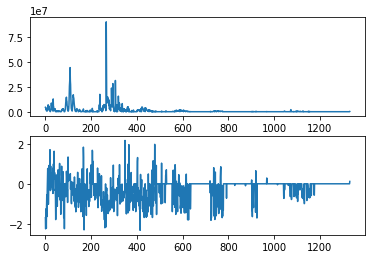

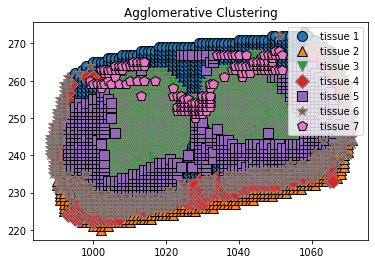

(3435, 300)


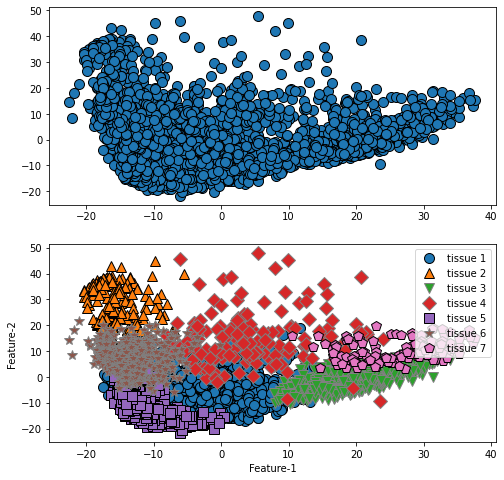

In [82]:
BinMat = Binning2(imzObj=oldCImz, regionID=5)
regionBinned = BinMat.getBinMat()
np.shape(regionBinned[0]), np.shape(regionBinned[1])
np.max(regionBinned[1]), np.min(regionBinned[1]), np.mean(regionBinned[1]), np.std(regionBinned[1])
regSd = StandardScaler().fit_transform(regionBinned[1])
np.max(regSd[1]), np.min(regSd[1]), np.mean(regSd[1]), np.std(regSd[1])

plt.subplot(211)
plt.plot(regionBinned[1][301])
plt.subplot(212)
plt.plot(regSd[301])
plt.show()

cList = np.array(regionBinned[2])
agg = AgglomerativeClustering(n_clusters=7)
assignment = agg.fit_predict(regSd) # x_pca  #fit_predict(data)
mglearn.discrete_scatter(cList[:,0], cList[:,1], assignment, labels=np.unique(assignment))
plt.legend(["tissue 1", "tissue 2", "tissue 3", "tissue 4", "tissue 5", "tissue 6", "tissue 7"], loc='upper right')
plt.title("Agglomerative Clustering")
plt.show()

pca = PCA(n_components=300)
# pca.fit_transform(binMat)
pca.fit(regSd)
x_pca = pca.transform(regSd)
print(x_pca.shape)
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.scatter(x_pca[:, 0], x_pca[:, 1])
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1])
plt.subplot(212)
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], assignment)
# plt.legend(assignment)
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.legend(["tissue 1", "tissue 2", "tissue 3", "tissue 4", "tissue 5", "tissue 6", "tissue 7"], loc='upper right')
plt.show()

Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Found region 10 with shape (59, 75, 1260)
Found region 10 with shape (59, 75, 1260)
Found region 10 with shape (59, 75, 1260)
Found region 10 with shape (59, 75, 1260)
Found region 10 with shape (59, 75, 1260)
Found region 10 with shape (59, 75, 1260)
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
|##############################################################################################################################################################################################| 100% Time: 0:00:00
|###############################################################################################################################

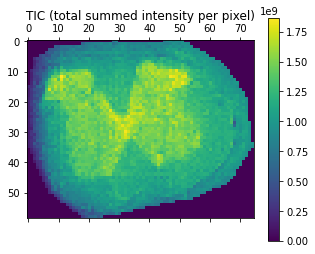

In [85]:
newCImz.plot_tic(newCImz.get_region_array(10))

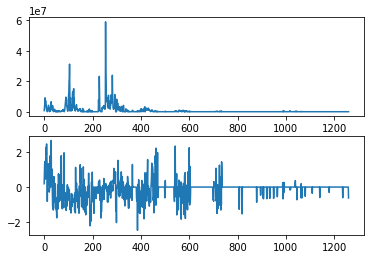

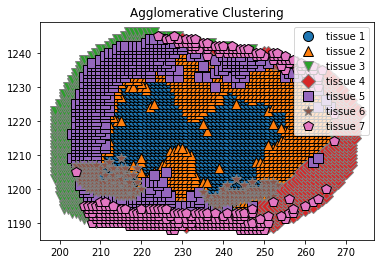

(3569, 300)


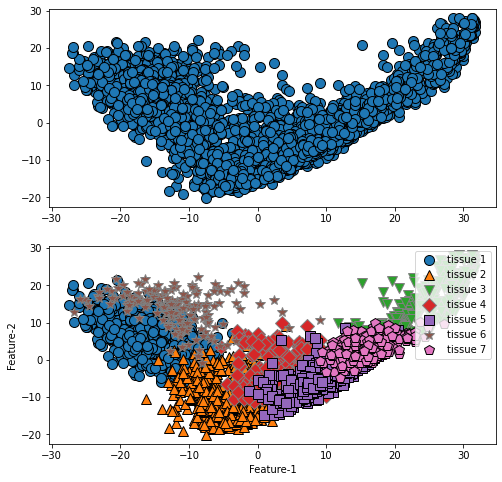

In [87]:
BinMat = Binning2(imzObj=newCImz, regionID=10)
regionBinned = BinMat.getBinMat()
np.shape(regionBinned[0]), np.shape(regionBinned[1])
np.max(regionBinned[1]), np.min(regionBinned[1]), np.mean(regionBinned[1]), np.std(regionBinned[1])
regSd = StandardScaler().fit_transform(regionBinned[1])
np.max(regSd[1]), np.min(regSd[1]), np.mean(regSd[1]), np.std(regSd[1])

plt.subplot(211)
plt.plot(regionBinned[1][301])
plt.subplot(212)
plt.plot(regSd[301])
plt.show()

cList = np.array(regionBinned[2])
agg = AgglomerativeClustering(n_clusters=7)
assignment = agg.fit_predict(regSd) # x_pca  #fit_predict(data)
mglearn.discrete_scatter(cList[:,1], cList[:,0], assignment, labels=np.unique(assignment))
plt.legend(["tissue 1", "tissue 2", "tissue 3", "tissue 4", "tissue 5", "tissue 6", "tissue 7"], loc='upper right')
plt.title("Agglomerative Clustering")
plt.show()

pca = PCA(n_components=300)
# pca.fit_transform(binMat)
pca.fit(regSd)
x_pca = pca.transform(regSd)
print(x_pca.shape)
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.scatter(x_pca[:, 0], x_pca[:, 1])
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1])
plt.subplot(212)
mglearn.discrete_scatter(x_pca[:, 0], x_pca[:, 1], assignment)
# plt.legend(assignment)
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.legend(["tissue 1", "tissue 2", "tissue 3", "tissue 4", "tissue 5", "tissue 6", "tissue 7"], loc='upper right')
plt.show()

### <span style="color:Purple"> 220210_reyzerml_IMC_380_plate1A_poslipids-NEW <span>

['/media/banikr2/DATA/MALDI/220210_reyzerml_IMC_380_plate1A_poslipids-NEW/220210_reyzerml_IMC_380_plate1A_poslipids-NEW.imzML']


/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  % (accession, raw_name, name)
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions


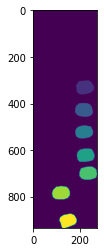

Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished


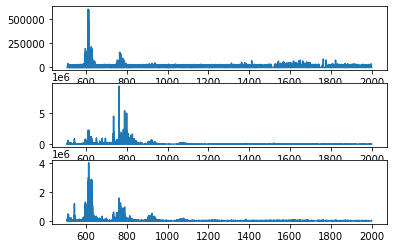

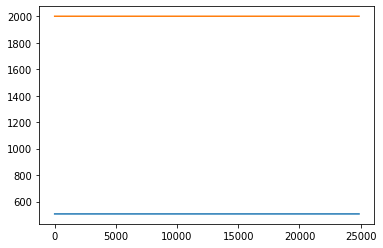

In [94]:
newDir = r'/media/banikr2/DATA/MALDI/220210_reyzerml_IMC_380_plate1A_poslipids-NEW'
newImzFile = glob(os.path.join(newDir, '*.imzML'))
print(newImzFile)

newImz = IMZMLExtract(newImzFile[0])
len(newImz.parser.coordinates)
plt.plot(newImz.parser.mzLengths)

plt.subplot(311)
plt.plot(newImz.parser.getspectrum(12)[0], newImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(newImz.parser.getspectrum(6000)[0], newImz.parser.getspectrum(6000)[1])
plt.subplot(313)
plt.plot(newImz.parser.getspectrum(13031)[0], newImz.parser.getspectrum(13031)[1])
plt.show()

minmz2 = []
maxmz2 = []
for i in range(len(newImz.parser.coordinates)):
    minmz2.append(newImz.parser.getspectrum(i)[0][0])
    maxmz2.append(newImz.parser.getspectrum(i)[0][-1])
    
plt.plot(minmz2)
plt.plot(maxmz2)

len(newImz.parser.coordinates)

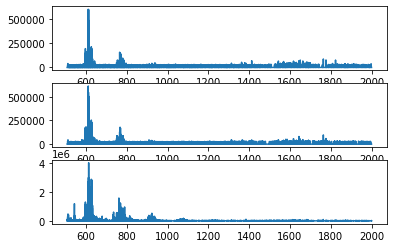

In [95]:
plt.subplot(311)
plt.plot(newImz.parser.getspectrum(12)[0], newImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(newImz.parser.getspectrum(1300)[0], newImz.parser.getspectrum(1300)[1])
plt.subplot(313)
plt.plot(newImz.parser.getspectrum(13031)[0], newImz.parser.getspectrum(13031)[1])
plt.show()

### <span style="color:Purple" > 220211_reyzerml_IMC_380_plate3A_poslipids <span>

['/media/banikr2/DATA/MALDI/220211_reyzerml_IMC_380_plate3A_poslipids/220211_reyzerml_IMC_380_plate3A_poslipids.imzML']


/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  % (accession, raw_name, name)
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions


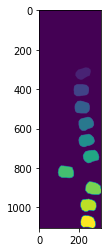

Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished


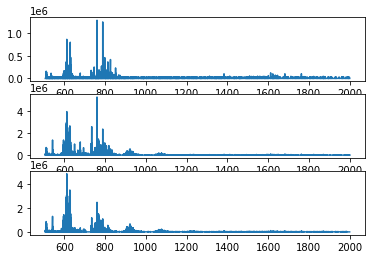

39640

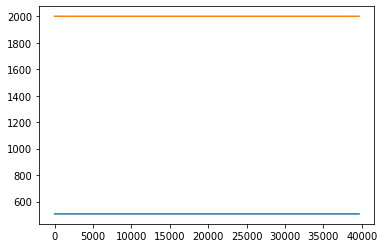

In [96]:
newDir = r'/media/banikr2/DATA/MALDI/220211_reyzerml_IMC_380_plate3A_poslipids'
newImzFile = glob(os.path.join(newDir, '*.imzML'))
print(newImzFile)

newImz = IMZMLExtract(newImzFile[0])
len(newImz.parser.coordinates)
plt.plot(newImz.parser.mzLengths)

plt.subplot(311)
plt.plot(newImz.parser.getspectrum(12)[0], newImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(newImz.parser.getspectrum(6000)[0], newImz.parser.getspectrum(6000)[1])
plt.subplot(313)
plt.plot(newImz.parser.getspectrum(13031)[0], newImz.parser.getspectrum(13031)[1])
plt.show()

minmz2 = []
maxmz2 = []
for i in range(len(newImz.parser.coordinates)):
    minmz2.append(newImz.parser.getspectrum(i)[0][0])
    maxmz2.append(newImz.parser.getspectrum(i)[0][-1])
    
plt.plot(minmz2)
plt.plot(maxmz2)

len(newImz.parser.coordinates)

### <span style="color:Purple" > 220211_reyzerml_IMC_380_plate4A_poslipids <span>

['/media/banikr2/DATA/MALDI/220211_reyzerml_IMC_380_plate4A_poslipids/220211_reyzerml_IMC_380_plate4A_poslipids.imzML']


/home/banikr2/.local/lib/python3.7/site-packages/pyimzML-1.5.1-py3.7.egg/pyimzml/ontology/ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size". Updating name to "pixel size (x)".
  % (accession, raw_name, name)
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions
Detecting Regions


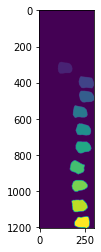

Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished
Detecting Regions Finished


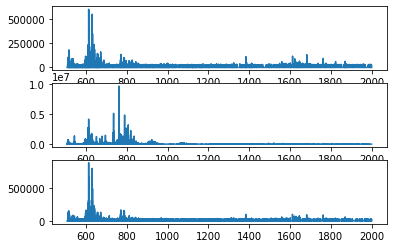

43434

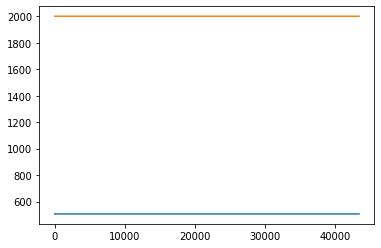

In [97]:
newDir = r'/media/banikr2/DATA/MALDI/220211_reyzerml_IMC_380_plate4A_poslipids'
newImzFile = glob(os.path.join(newDir, '*.imzML'))
print(newImzFile)

newImz = IMZMLExtract(newImzFile[0])
len(newImz.parser.coordinates)
plt.plot(newImz.parser.mzLengths)

plt.subplot(311)
plt.plot(newImz.parser.getspectrum(12)[0], newImz.parser.getspectrum(12)[1])
plt.subplot(312)
plt.plot(newImz.parser.getspectrum(6000)[0], newImz.parser.getspectrum(6000)[1])
plt.subplot(313)
plt.plot(newImz.parser.getspectrum(13031)[0], newImz.parser.getspectrum(13031)[1])
plt.show()

minmz2 = []
maxmz2 = []
for i in range(len(newImz.parser.coordinates)):
    minmz2.append(newImz.parser.getspectrum(i)[0][0])
    maxmz2.append(newImz.parser.getspectrum(i)[0][-1])
    
plt.plot(minmz2)
plt.plot(maxmz2)

len(newImz.parser.coordinates)

Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spec

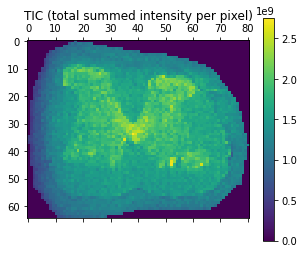

In [98]:
newImz.plot_tic(newImz.get_region_array(1))

Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spec

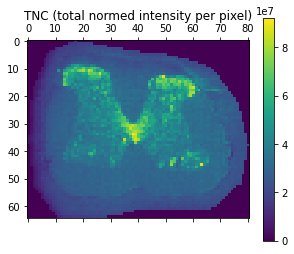

In [99]:
newImz.plot_tnc(newImz.get_region_array(1))

In [100]:
newImz.plot_fcs(newImz.get_region_array(1))

Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Fetching region shape
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Found region 1 with shape (65, 81, 40285)
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spectra
Fetching region spec

TypeError: plot_fcs() missing 1 required positional argument: 'positions'

### Image specifications
old and new positive lipid MALDI images are compared for section-section and tissue-tissue comparison. <br>

**observations:** 
After processing(peak picking) in Cardinal, each spectrum/scan/pixel has same number of m/z numbers. Only the number of scans per section vary due to spatial distribution of spine/tissues. 

|sec. | #Spectrum | #Coordinates  | Euclidean<br>distance | Cosine<br>similarity | Pearson r | p-value | Image | 
|----:|:--------|:-------------------|:------|:------|:-----------|:------|:------|
| 1 | 1400 - 201 | (595, 264)<br>(597, 249) | 15.1327 | 0.7822  | 0.76991 | 9.9846e-262 |<img src="../Images/1400_201_1.png" alt="Drawing" style="width:150px;"/>|
| 1 | 200 - 21 | (596, 249, 1)<br>(567, 245, 1) | 29.27 | 0.3739  | 0.3420 | 7.1980e-38 |<img src="../Images/200_21_1.png" alt="Drawing" style="width:150px;"/>|
| 1 | 200 - 201 | (596, 249, 1)<br>(597, 249, 1) | 1.0 | 0.9864  | 0.9852 | 0.0 |
| 1 | 2000 - 201 | (616, 271, 1)<br>(597, 249, 1) | 29.068 | 0.8151  | 0.8002 | 1.1490e-297 |
| 3 | 5892 - 5980 | (750, 185)<br>(750, 186) | 1.0 | 0.9962  | 0.9963 | 0.0 | <img src="../Images/5892_5980_3.png" alt="Drawing" style="width:150px;"/> |
| 3 | 5892 - 6750 | (750, 185)<br>(750, 195) | 10.0 | 0.6313  | 0.6228 | 5.8499e-144 | <img src="../Images/5892_6750_3.png" alt="Drawing" style="width:150px;"/>|
| 3 | 4463 - 6750 | (751, 169)<br>(750, 195) | 26.0192 | 0.9393  | 0.9319 | 0.0 | <img src="../Images/4463_6750_3.png" alt="Drawing" style="width:150px;"/>|
| 3 | 4446 - 6601 | (734, 169)<br>(766, 193) | 40.0 | 0.9752  | 0.9735 | 0.0 | <img src="../Images/4446_6601_3.png" alt="Drawing" style="width:150px;"/>|
| 2 | 19264 - 17451 | (725, 290)<br>(727, 268) | 22.09 | 0.6922  | 0.6800 | 1.8057e-181 | <img src="../Images/19264_17451_2.png" alt="Drawing" style="width:150px;"/>|
| 2 | 17711 - 17451 | (725, 271)<br>(727, 268) | 3.6055 | 0.9867  | 0.9866 | 0.0 | <img src="../Images/17711_17451_2.png" alt="Drawing" style="width:150px;"/>|
| 1-2 | 1400 - 17451 | (595, 264)<br>(727, 268) | 132.0605 | 0.9832  | 0.9829 | 0.0 | <img src="../Images/1400_17451_1_2.png" alt="Drawing" style="width:250px;"/>|

Has to be inside one section? or plate? 